This notebook explores the environmental time series data in relation to extreme events.
The goal is to better understand trends, variability, and basic statistics in python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dates = pd.date_range("2010-01-01", periods=200)
rainfall = np.random.gamma(shape=2, scale=3, size=200)

dataframe = pd.DataFrame ({
    "date": dates,
    "rainfall_mm": rainfall
})

dataframe.head()

,date,rainfall_mm
0,2010-01-01,3.161037
1,2010-01-02,6.011677
2,2010-01-03,3.448013
3,2010-01-04,8.363629
4,2010-01-05,0.724854


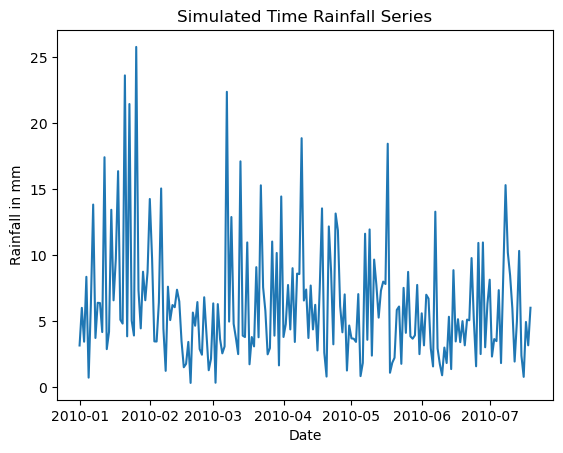

In [5]:
plt.figure()
plt.plot(dataframe["date"], dataframe["rainfall_mm"])
plt.title("Simulated Time Rainfall Series")
plt.xlabel("Date")
plt.ylabel("Rainfall in mm")
plt.show()

I begin by computing basic statistics to understand the distribution and variability of the rainfall values.

In [6]:
dataframe["rainfall_mm"].describe()

count    200.000000
mean       6.248966
std        4.552454
min        0.325112
25%        3.173367
50%        5.056131
75%        7.766447
max       25.779127
Name: rainfall_mm, dtype: float64

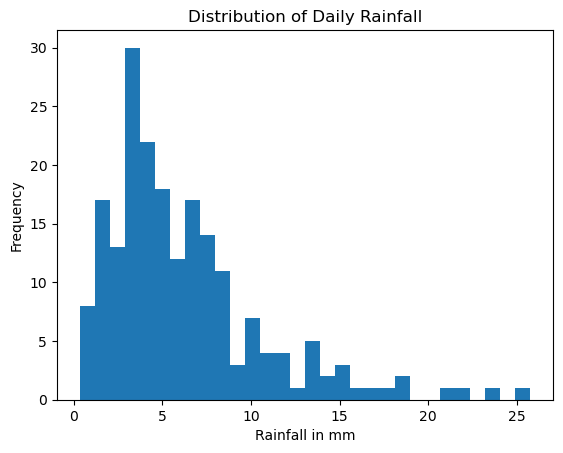

In [7]:
plt.figure()
plt.hist(dataframe["rainfall_mm"], bins=30)
plt.xlabel("Rainfall in mm")
plt.ylabel("Frequency")
plt.title("Distribution of Daily Rainfall")
plt.show()

Extreme rainfall events are defined as rainfall above the 95th percentile of the rainfall distribution.

In [10]:
threshold = dataframe["rainfall_mm"].quantile(0.95)
threshold

dataframe["is_extreme"] = dataframe["rainfall_mm"] > threshold
dataframe[dataframe["is_extreme"]].head()
dataframe["is_extreme"].value_counts()


is_extreme
False    190
True      10
Name: count, dtype: int64

In [ ]:
plt.figure()
plt.plot(dataframe["date"], dataframe["rainfall_mm"], label="Rainfall")

plt.scatter(
    dataframe.loc[dataframe["is_extreme"], "date"],
    dataframe.loc[dataframe["is_extreme"], "rainfall_mm"],
    color="red",
    label="Extreme events"
    )
plt.axhline(threshold, linestyle="--", label="95th percentile threshold")

plt.legend()
plt.xlabel("Date")
plt.ylabel("Rainfall in mm")
plt.title("Extreme rainfall over time")
plt.show()